In [1]:
from Binaries import *

AllEvents = EventGenerator("all", real_background = False, split = 1)

In [2]:
all_energies = []

for batch in AllEvents:
    for shower in batch:
        all_energies.append(shower.Energy)

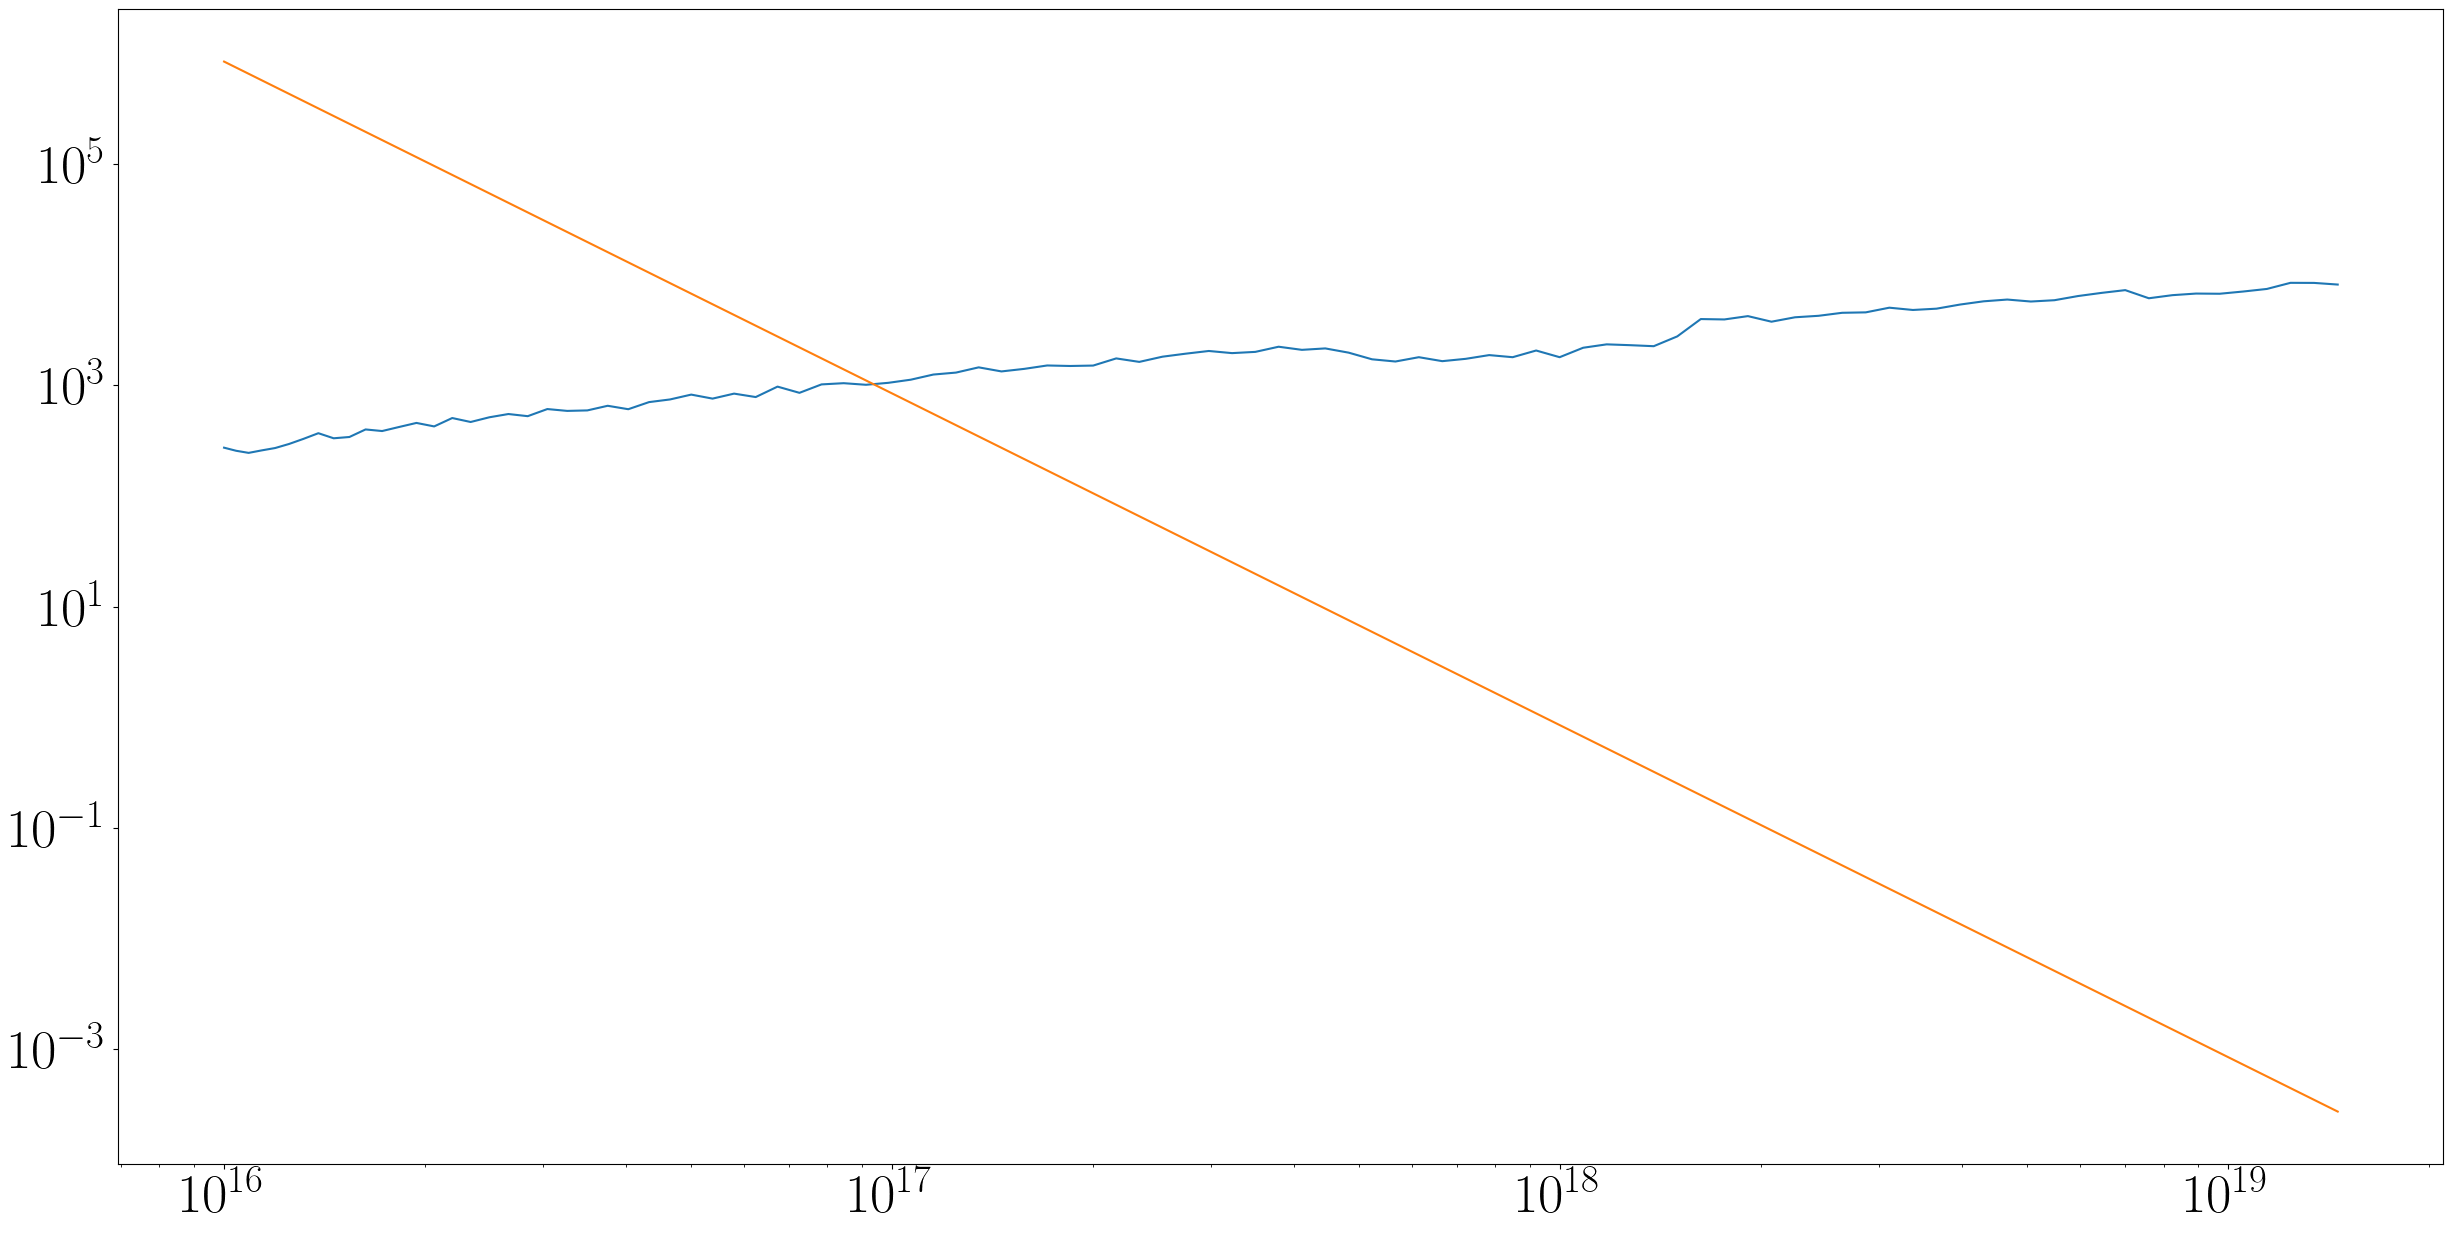

In [169]:
x, n_e = np.loadtxt("/cr/users/filip/Binaries/energy_histogram.csv", unpack = True)

plt.plot(x, n_e)
plt.plot(x, 100 * n_e * n_e[np.argmax(n_e)]/n_e * x**(-3) / x[np.argmin(x)]**(-3))

plt.xscale("log")
plt.yscale("log")

In [5]:
from Binaries import *

TP, _, _, FN = HardwareClassifier().load_and_print_performance("final_all_triggers")

# calculate trigger efficiency over predictions scaled by energy (flux)
def get_true_accuracy(TP : np.ndarray, FN : np.ndarray, return_scale : bool = False) -> float : 

    x, n_e = np.loadtxt("/cr/users/filip/Binaries/energy_histogram.csv", unpack = True)
    
    # calculated in /cr/users/filip/Trigger/BuildDataset/true_efficiency.ipynb
    if not return_scale: best_efficiency = get_true_accuracy(np.array(list(TP) + list(FN)), [], return_scale = True)

    efficiency_scaled, weights = 0, 0
    n_all = len(TP) + len(FN)
    weights = 0

    for prediction in TP[:, 1]:
        idx = np.digitize(prediction, x) - 1
        weight = 100 * n_e[idx] * n_e[np.argmax(n_e)]/n_e[idx] * x[idx]**(-3) / x[np.argmin(x)]**(-3)
        efficiency_scaled += 1/(weight) * 1/n_all
        weights += weight

    efficiency_scaled *= weights * n_all

    return efficiency_scaled if return_scale else 1 - (best_efficiency - efficiency_scaled) / best_efficiency

HardwareClassifier                            final_all_triggers                    89144       0       0  156908 -> ACC =  36.23%


In [6]:
a = get_true_accuracy(TP, FN)

print(a)

0.0586676786162561


In [7]:
Network = NNClassifier("ENSEMBLES/120_LSTM_3L_Downsampled_AllEnergies_NoCuts/ensemble_01", supress_print = True)
TP_, _, _, FN_ = Network.load_and_print_performance("validation_data")


c = get_true_accuracy(TP_, FN_)
print(c)

ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   validation_data                       49503       0       0     569 -> ACC =  98.86%
0.9684897589900678


In [82]:
mask = np.array([[[], []]])
c = get_true_accuracy(Network, np.array(list(TP_) + list(FN_)), mask)
a = get_true_accuracy(HardwareClassifier(), , mask)

print(a)
print(c)

0.9059866879423149
1.0
